## 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
- 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

## 주택도시보증공사_전국 평균 분양가격(2019년 12월)
- 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
- 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [2]:
import pandas as pd

In [3]:
df_last = pd.read_csv('C:/Users/User/Desktop/opendata/data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949') # 'euc-kr'도 가능
df_last.shape

(4335, 5)

In [4]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [6]:
df_first = pd.read_csv('C:/Users/User/Desktop/opendata/data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.shape

(17, 22)

In [7]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [10]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [12]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

분양가격이 object라서 계산할 수 없어서 수치형 데이터로 변환

결측치가 있으면 제대로 변환안될 수 있어서 pd.to_numeric으로 데이터타입 변경

In [13]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

error option에는 raise, coerce, ignore 있음. coerce와 ignore은 공백 강제 변환

In [14]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3

In [15]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [16]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [17]:
df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [18]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [19]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과','~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하','')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ','').str.strip()
df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [20]:
df_last.head(5)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,102㎡~


In [21]:
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis=1)
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [22]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [23]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


.groupby(['인덱스로 사용할 컬럼명'])['계산할 컬럼 값'].연산()

In [24]:
df_last.groupby(['지역명', '연도'])['평당분양가격'].mean().unstack().round()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


In [26]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [27]:
df_last.groupby(['지역명', '연도'])['평당분양가격'].max().unstack().round().T
group = df_last.groupby(['지역명', '연도'])['평당분양가격'].min()
group.unstack().transpose()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,6801.3,10160.7,7260.0,7078.5,7428.3,8259.9,8012.4,9735.0,18651.6,8487.6,7992.6,10292.7,6289.8,6352.5,7342.5,6926.7,6164.4
2016,6656.1,10553.4,7491.0,6949.8,7903.5,8355.6,8002.5,9669.0,19918.8,8530.5,8438.1,9801.0,6289.8,6270.0,7458.0,6976.2,6319.5
2017,6639.6,11088.0,7837.5,7543.8,8078.4,9962.7,8580.0,9942.9,19364.4,8820.9,9111.3,10335.6,6791.4,6557.1,9995.7,7329.3,6520.8
2018,7312.8,12516.9,8679.0,7989.3,8094.9,9787.8,8243.4,12058.2,16701.3,9867.0,9537.0,9537.0,7101.6,7203.9,9741.6,7533.9,6850.8
2019,7626.3,13810.5,9009.0,8157.6,10583.1,13054.8,10979.1,12246.3,22578.6,9867.0,8962.8,11269.5,7101.6,7748.4,9741.6,7695.6,7009.2


## .pivot_table의 aggfunc 기본값은 mean

In [30]:
a = pd.pivot_table(df_last, index=['지역명'], columns='연도', values='평당분양가격', aggfunc='max')
b = pd.pivot_table(df_last, index=['연도','지역명'], values='평당분양가격')
c = pd.pivot_table(df_last, index=['지역명', '연도'], values='평당분양가격')
c

평당분양가격
지역명 연도               
강원  2015  7188.060000
    2016  7162.903846
    2017  7273.560000
    2018  8219.255000
    2019  8934.475000
...               ...
충북  2015  6828.800000
    2016  7133.335000
    2017  7473.120000
    2018  8149.295000
    2019  7970.875000

[85 rows x 1 columns]

## 시각화

In [31]:
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun gothic")
plt.rc("lines",color='red')
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


<Axes: xlabel='지역명'>

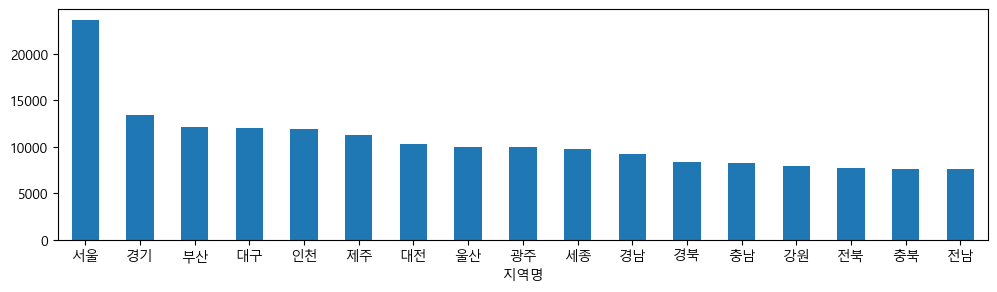

In [32]:
a = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
a.plot.bar(rot=0, figsize=(12,3))

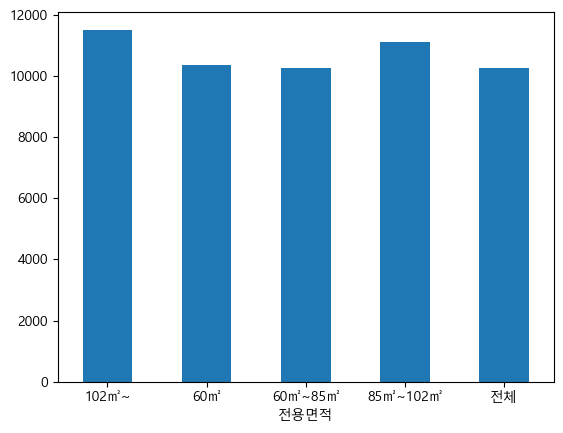

In [33]:
b = df_last.groupby(['전용면적'])['평당분양가격'].mean().plot.bar(rot=0)

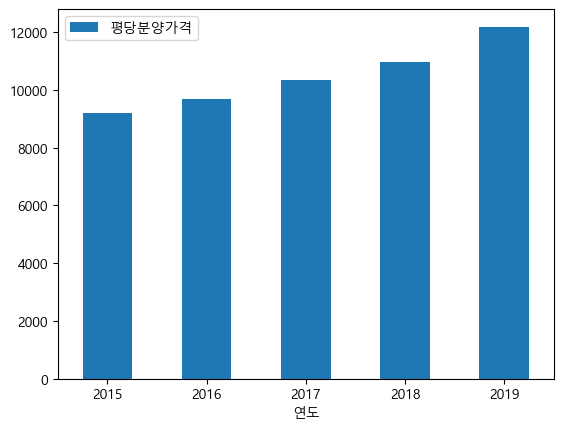

In [34]:
c = df_last.pivot_table(index='연도', values='평당분양가격').plot(kind='bar', rot=0)

<Axes: >

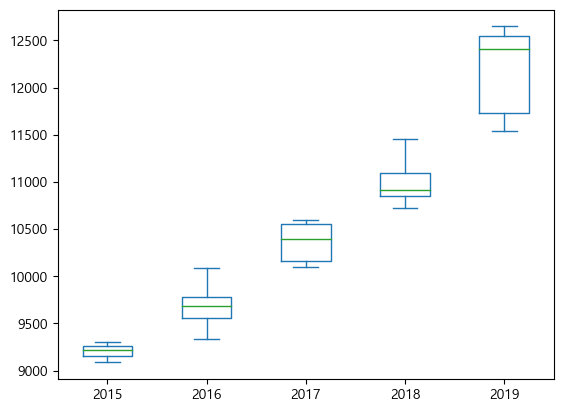

In [35]:
d = df_last.pivot_table(index='월', columns='연도', values='평당분양가격')
d.plot.box()

<Axes: >

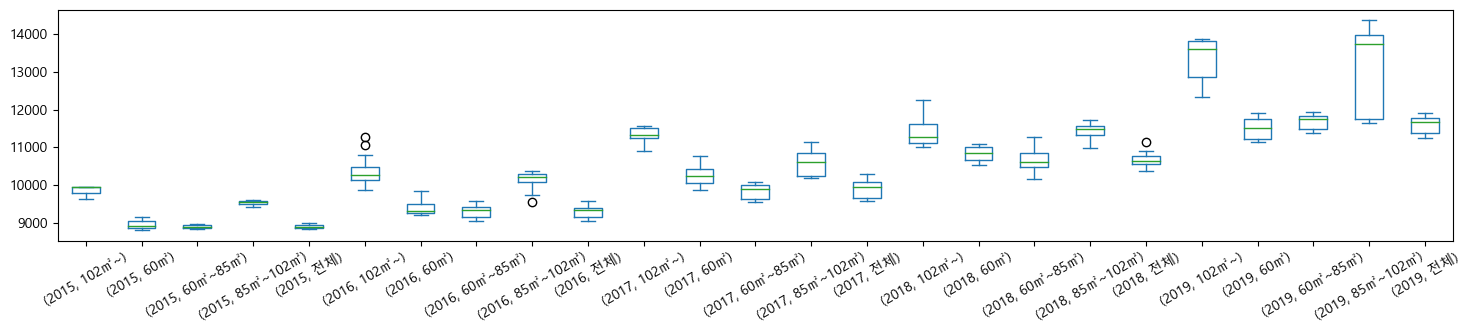

In [36]:
e = df_last.pivot_table(index='월', columns=['연도','전용면적'], values='평당분양가격')
e.plot.box(rot=30, figsize=(18,3))

<Axes: xlabel='월'>

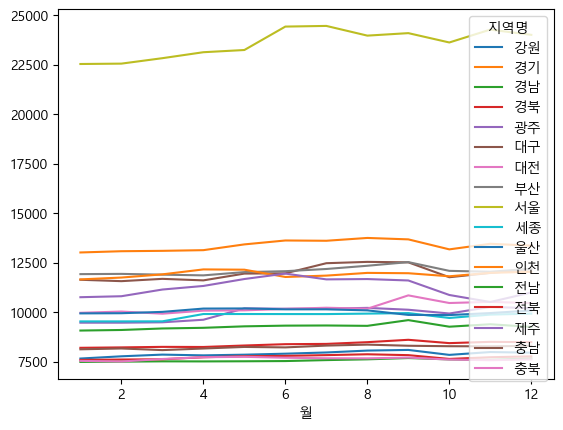

In [37]:
f = df_last.pivot_table(index='월', columns='지역명', values='평당분양가격')
f.plot()

<Axes: xlabel='지역명'>

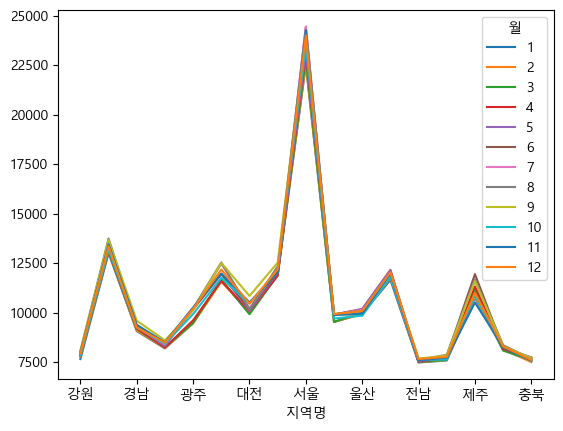

In [38]:
g = df_last.pivot_table(index='지역명', columns='월', values='평당분양가격')
g.plot()

<Axes: xlabel='연도', ylabel='평당분양가격'>

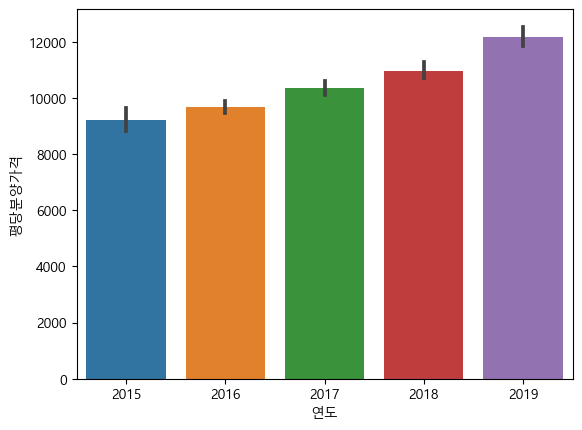

In [39]:
import seaborn as sns
sns.barplot(data=df_last, x='연도', y='평당분양가격')

C:\Users\User\AppData\Local\Temp\ipykernel_7844\1825231501.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar',


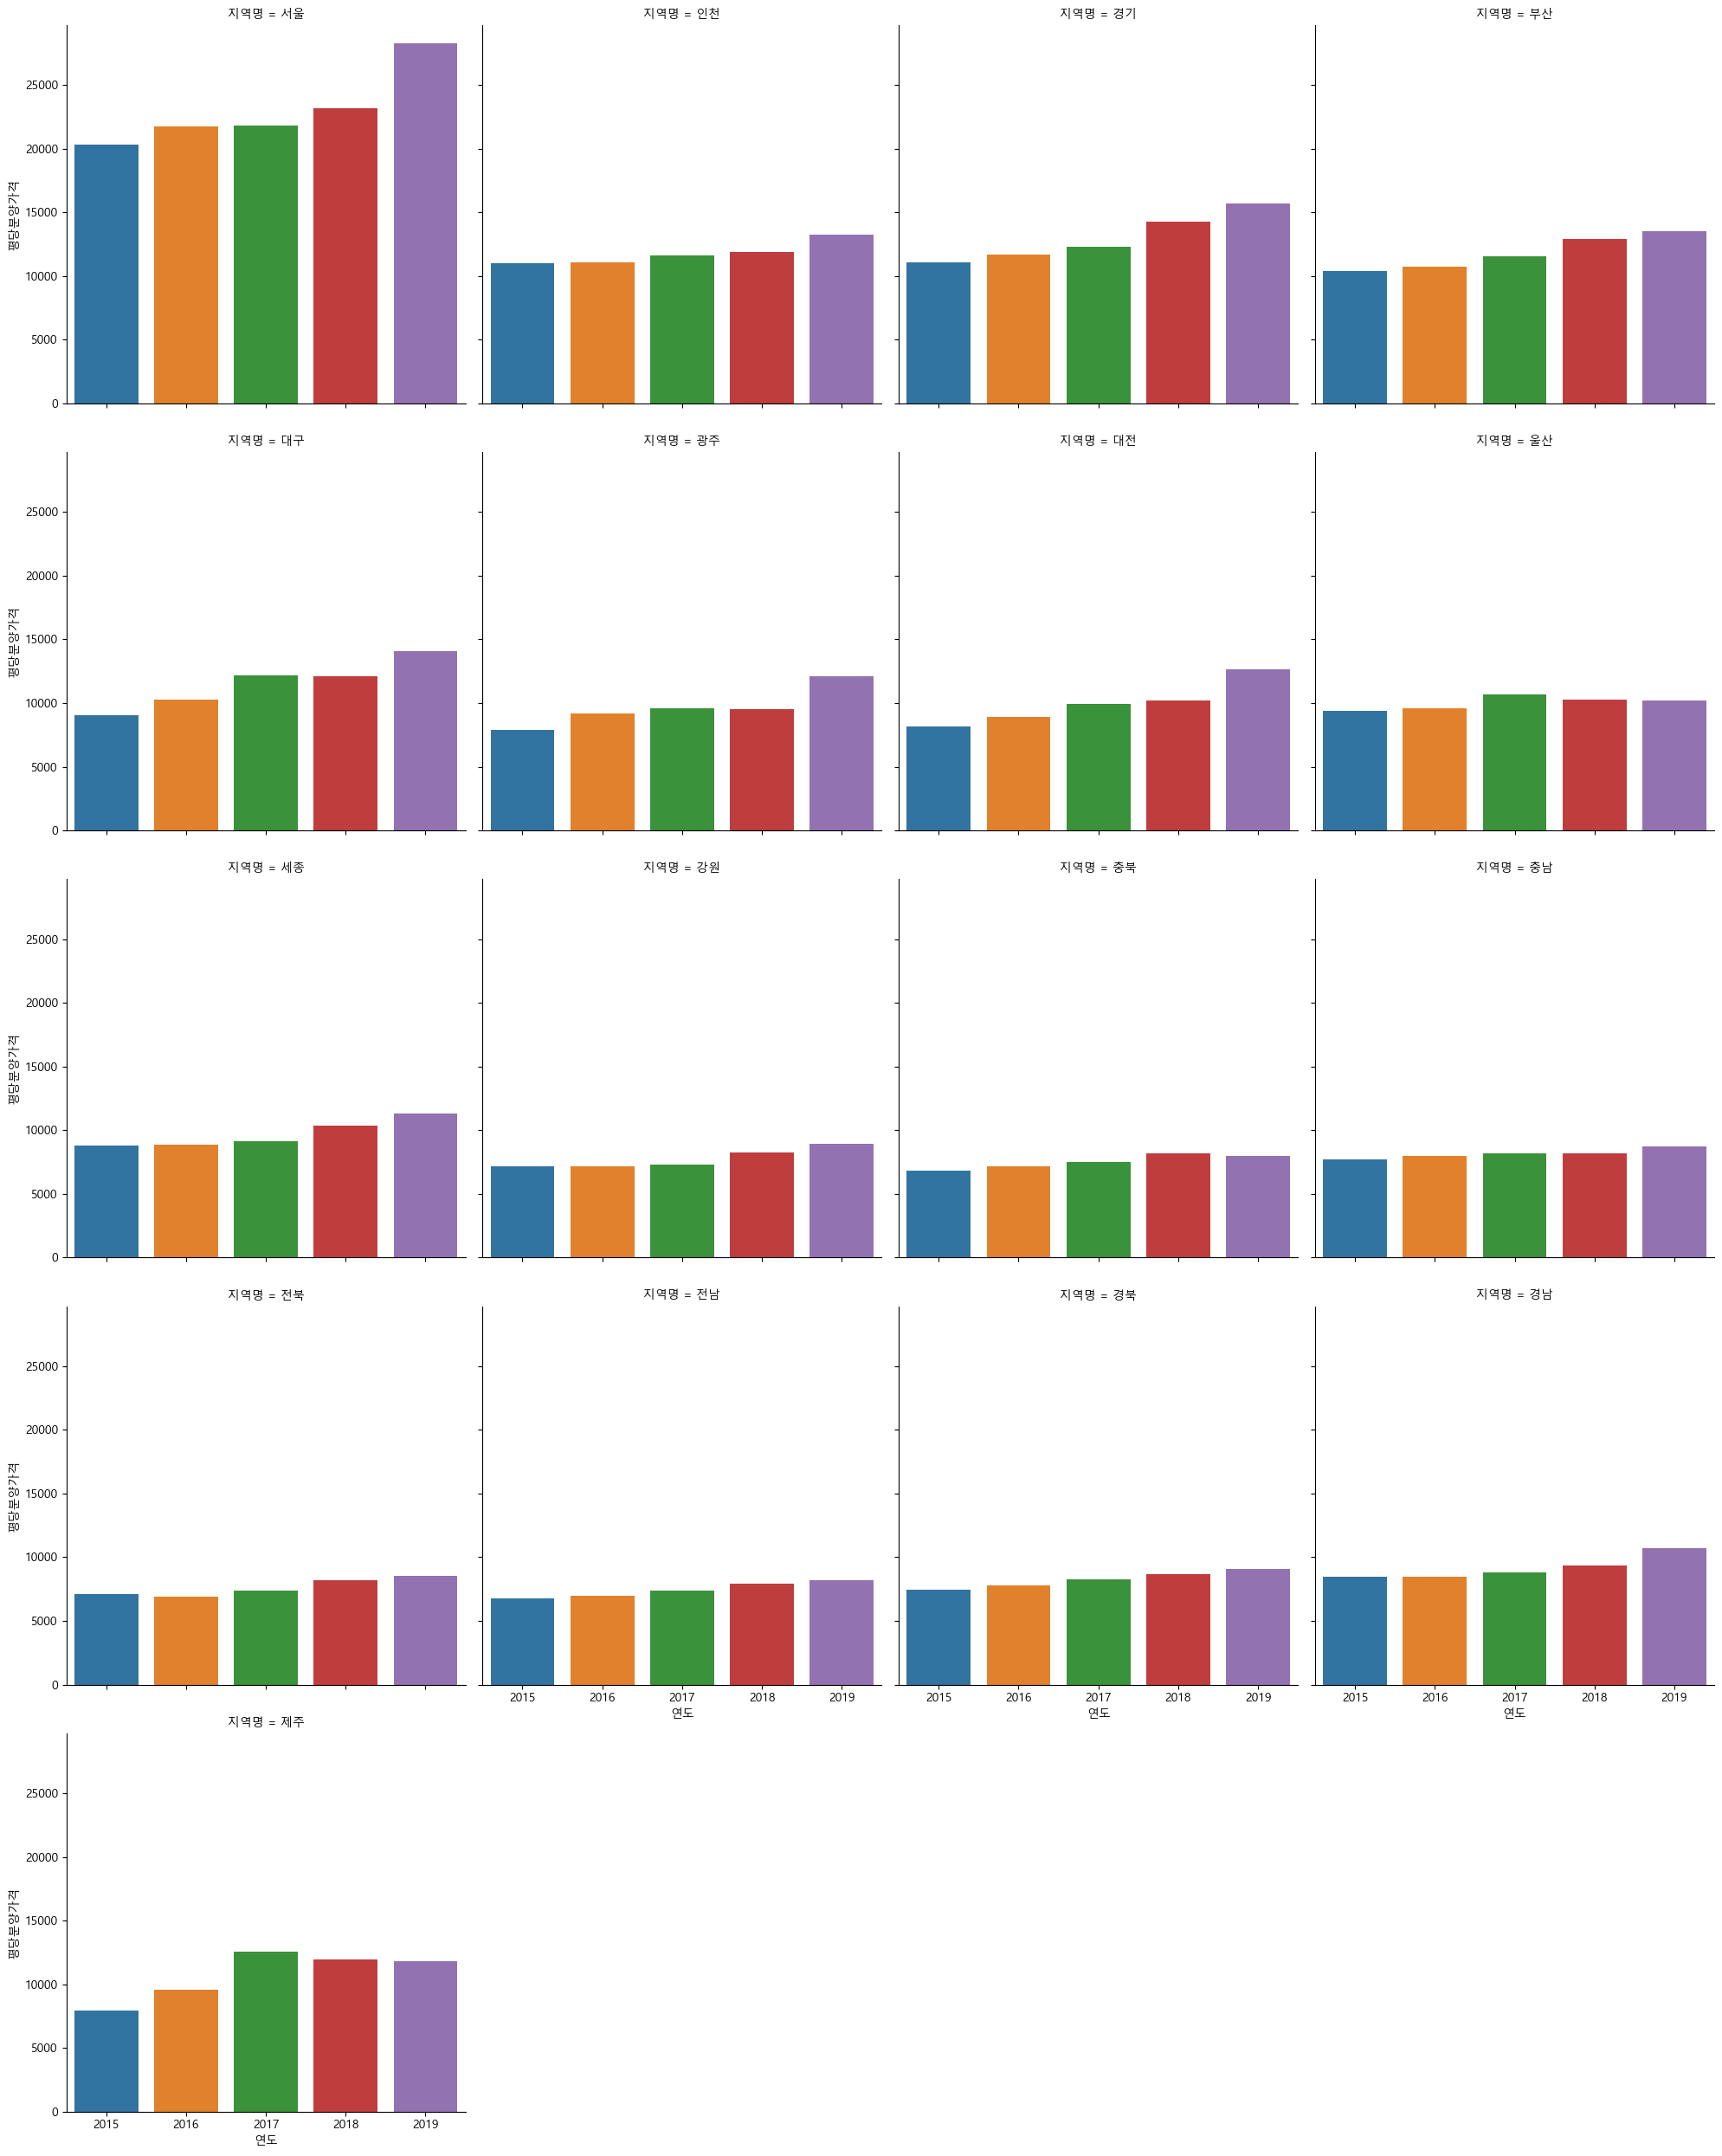

In [41]:
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar', 
            col='지역명', col_wrap=4, ci=None)

C:\Users\User\AppData\Local\Temp\ipykernel_7844\3278765263.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', ci=None)


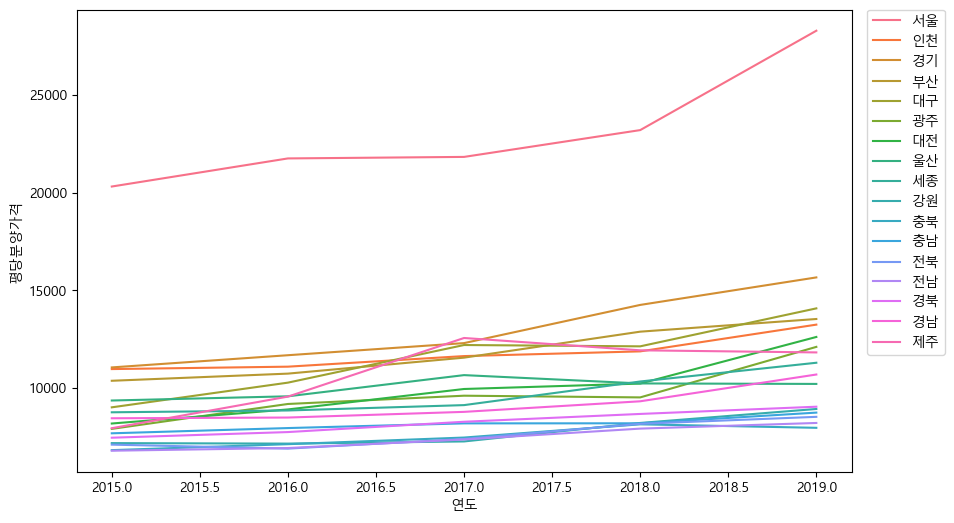

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\si

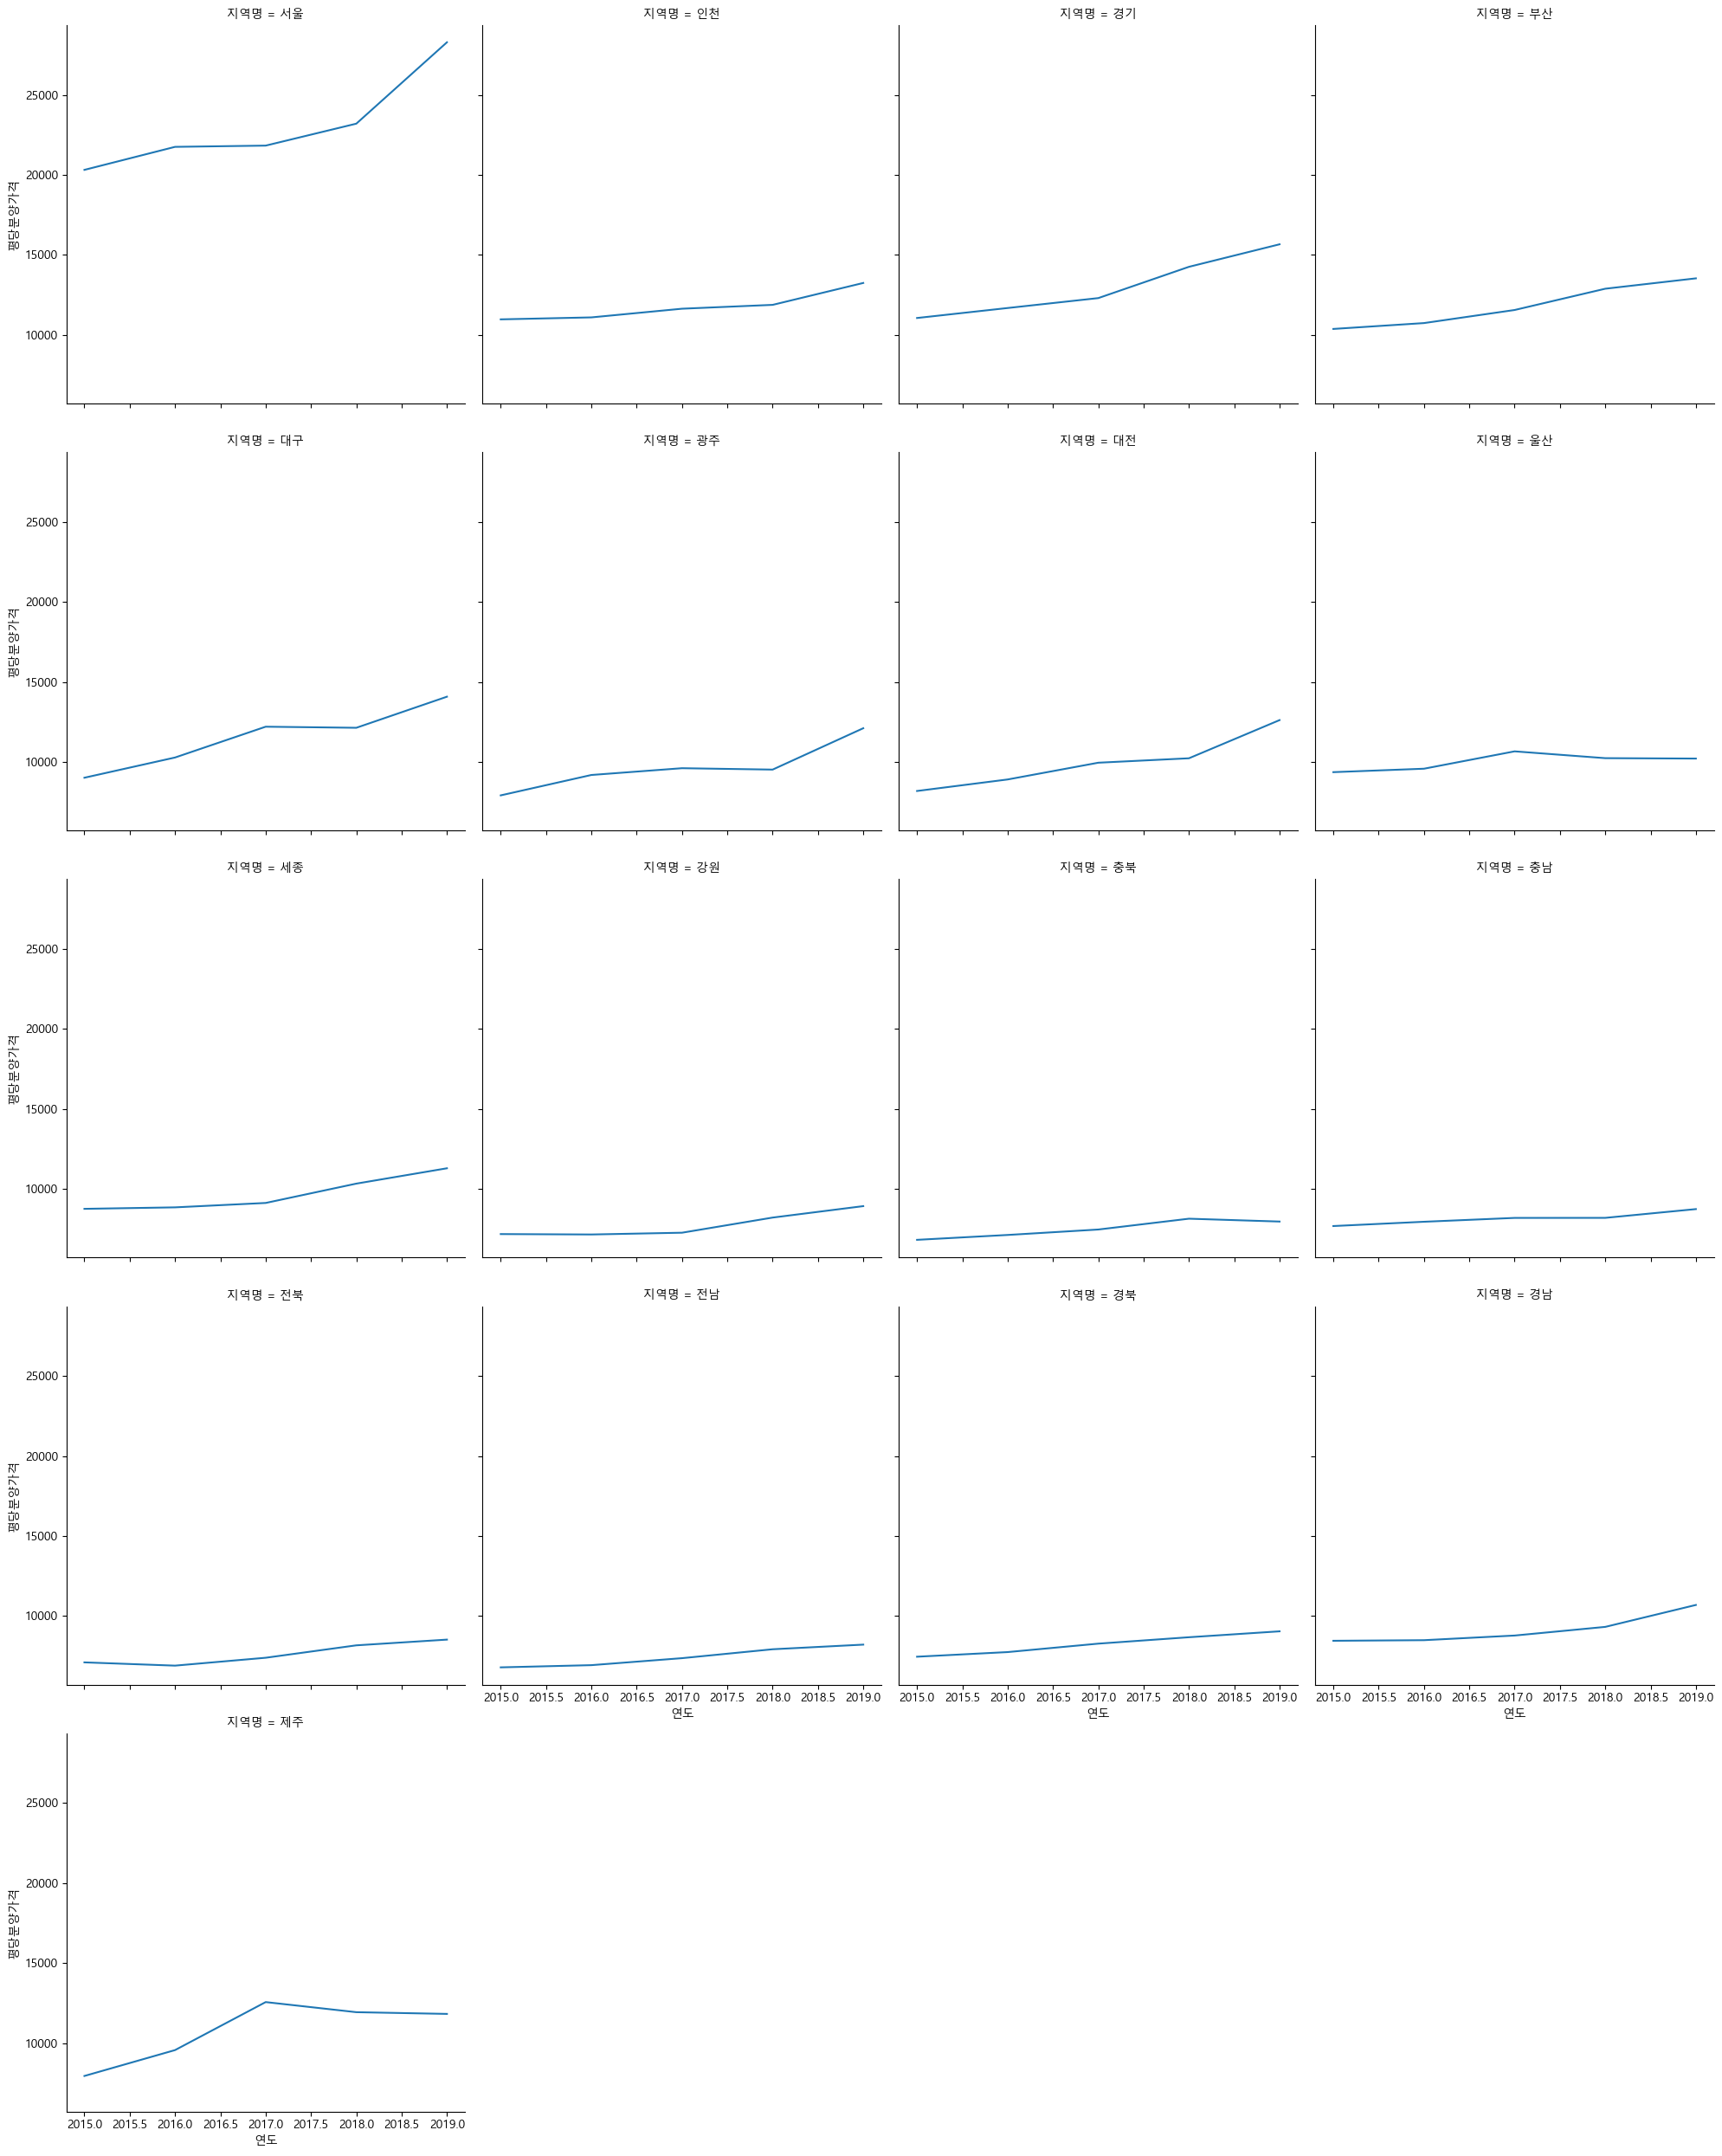

In [43]:
sns.relplot(data=df_last, x='연도', y='평당분양가격', col='지역명', ci=None,
           col_wrap=4, kind='line')

<Axes: xlabel='연도', ylabel='평당분양가격'>

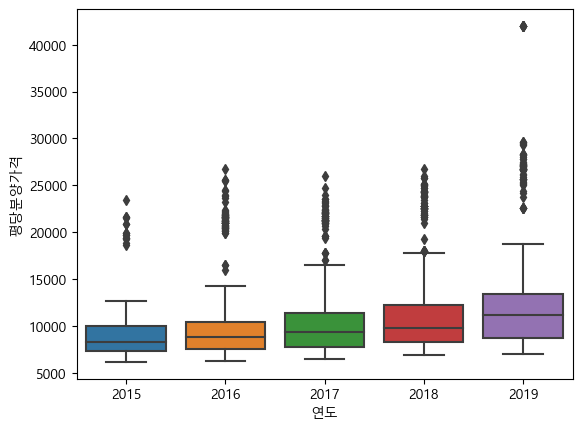

In [44]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

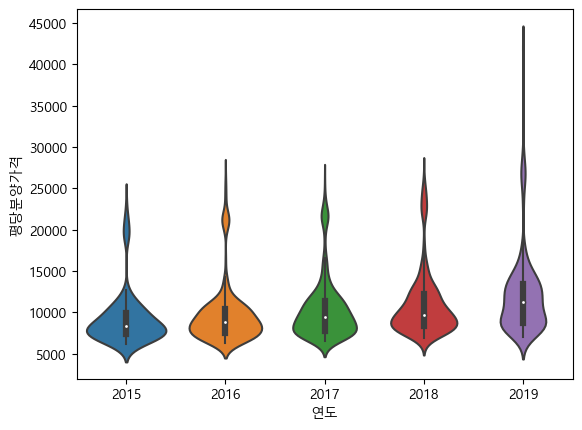

In [45]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격')

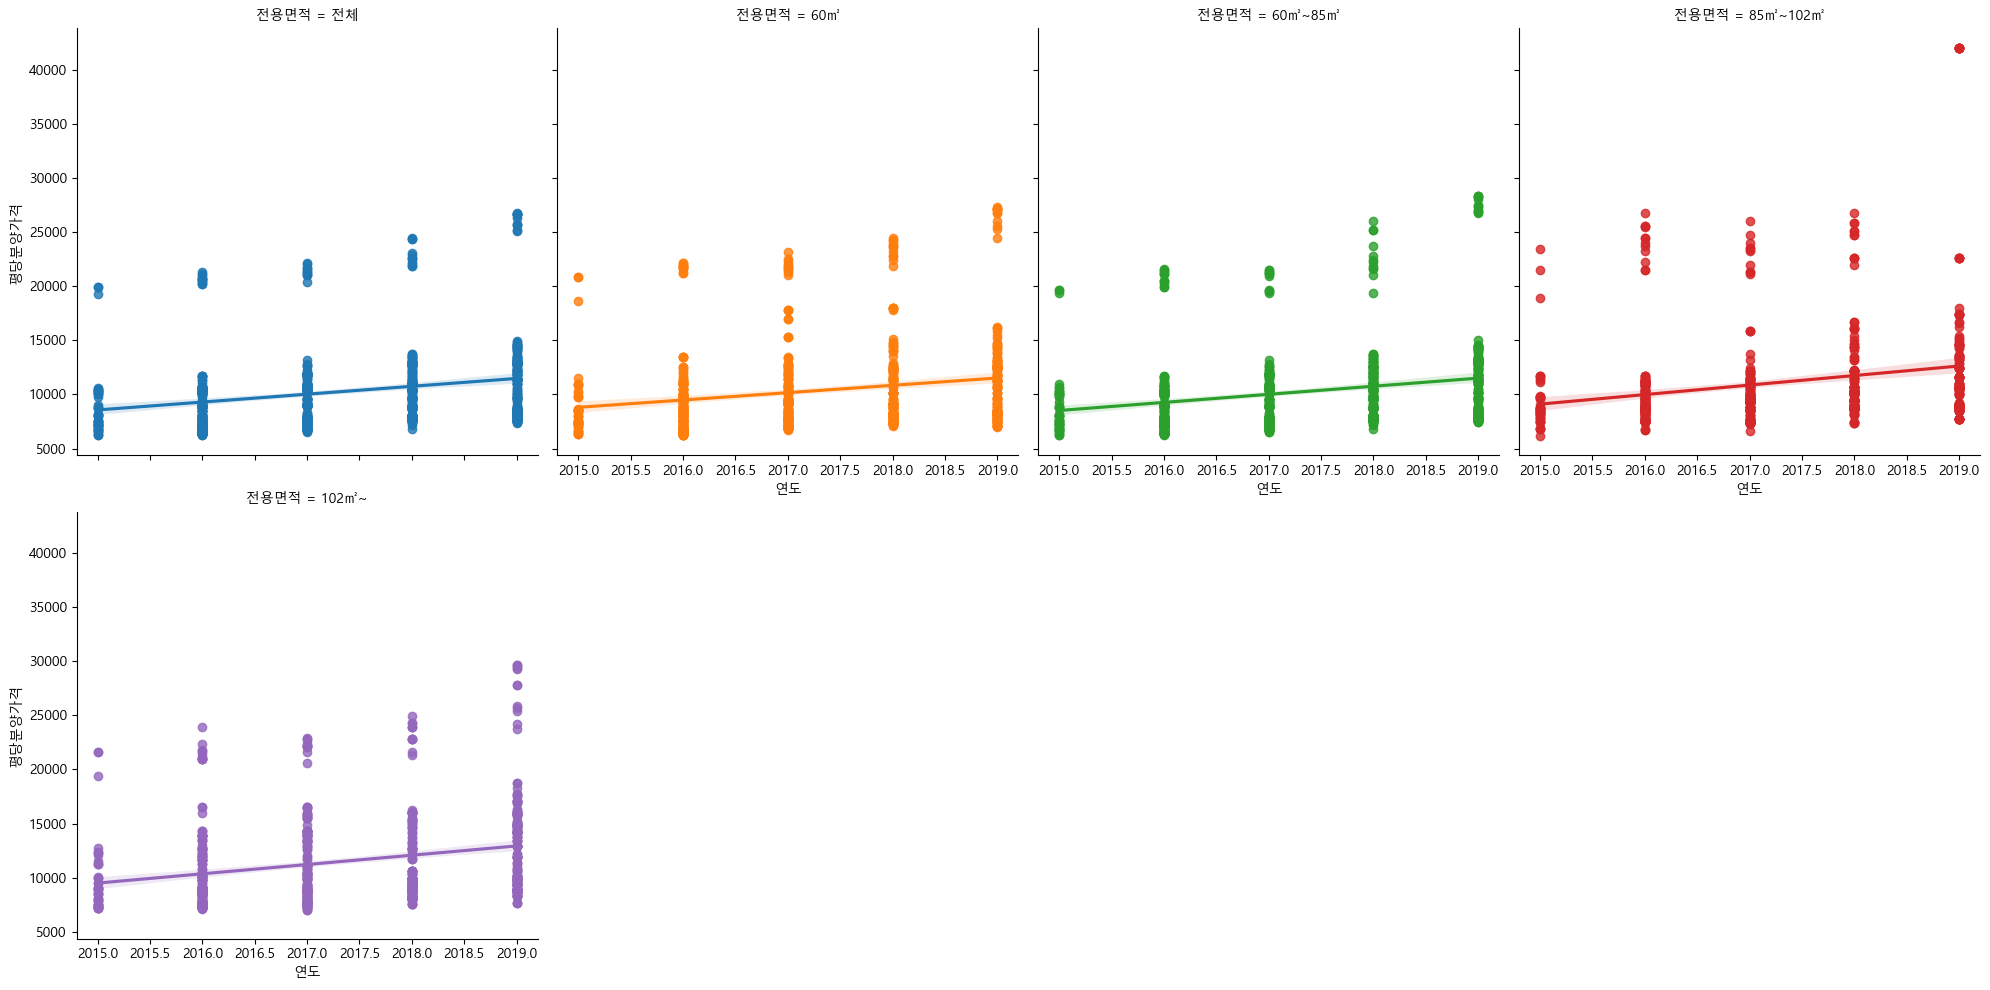

In [46]:
sns.lmplot(data=df_last, x='연도', y='평당분양가격', col='전용면적', 
          col_wrap=4, hue='전용면적')

In [49]:
df_last['평당분양가격'].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [50]:
max_price = df_last['평당분양가격'].max()
max_price

42002.399999999994

In [51]:
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


In [52]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [54]:
price = df_last.loc[df_last['평당분양가격'].notnull(), '평당분양가격']
price

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
4327    10114.5
4328    10715.1
4330    12810.6
4332    12863.4
4334    11883.3
Name: 평당분양가격, Length: 3957, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_7844\2786833678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(price)


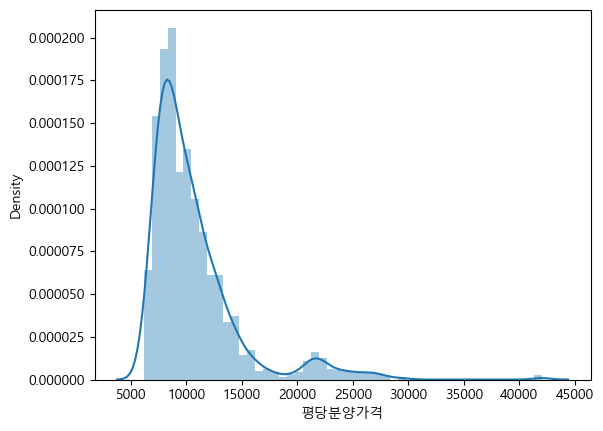

In [55]:
a = sns.distplot(price)

C:\Users\User\AppData\Local\Temp\ipykernel_7844\441498700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  b = sns.distplot(price, hist=False, rug=True)


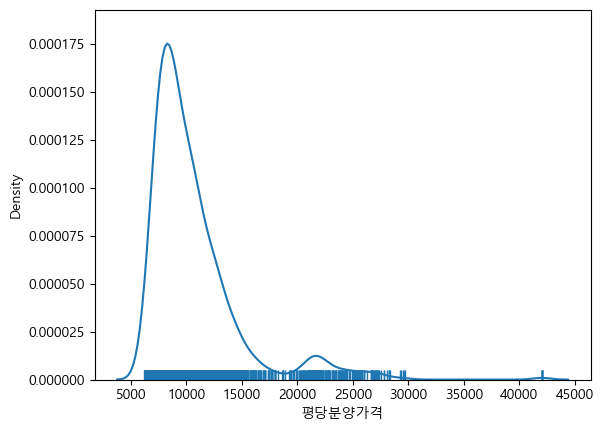

In [56]:
b = sns.distplot(price, hist=False, rug=True)

<Axes: xlabel='평당분양가격', ylabel='Density'>

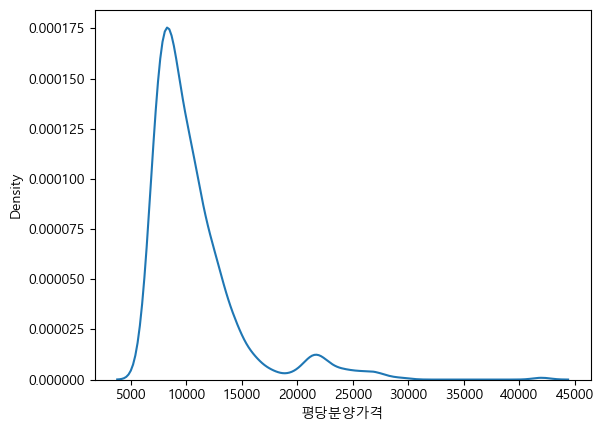

In [57]:
sns.kdeplot(price)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\

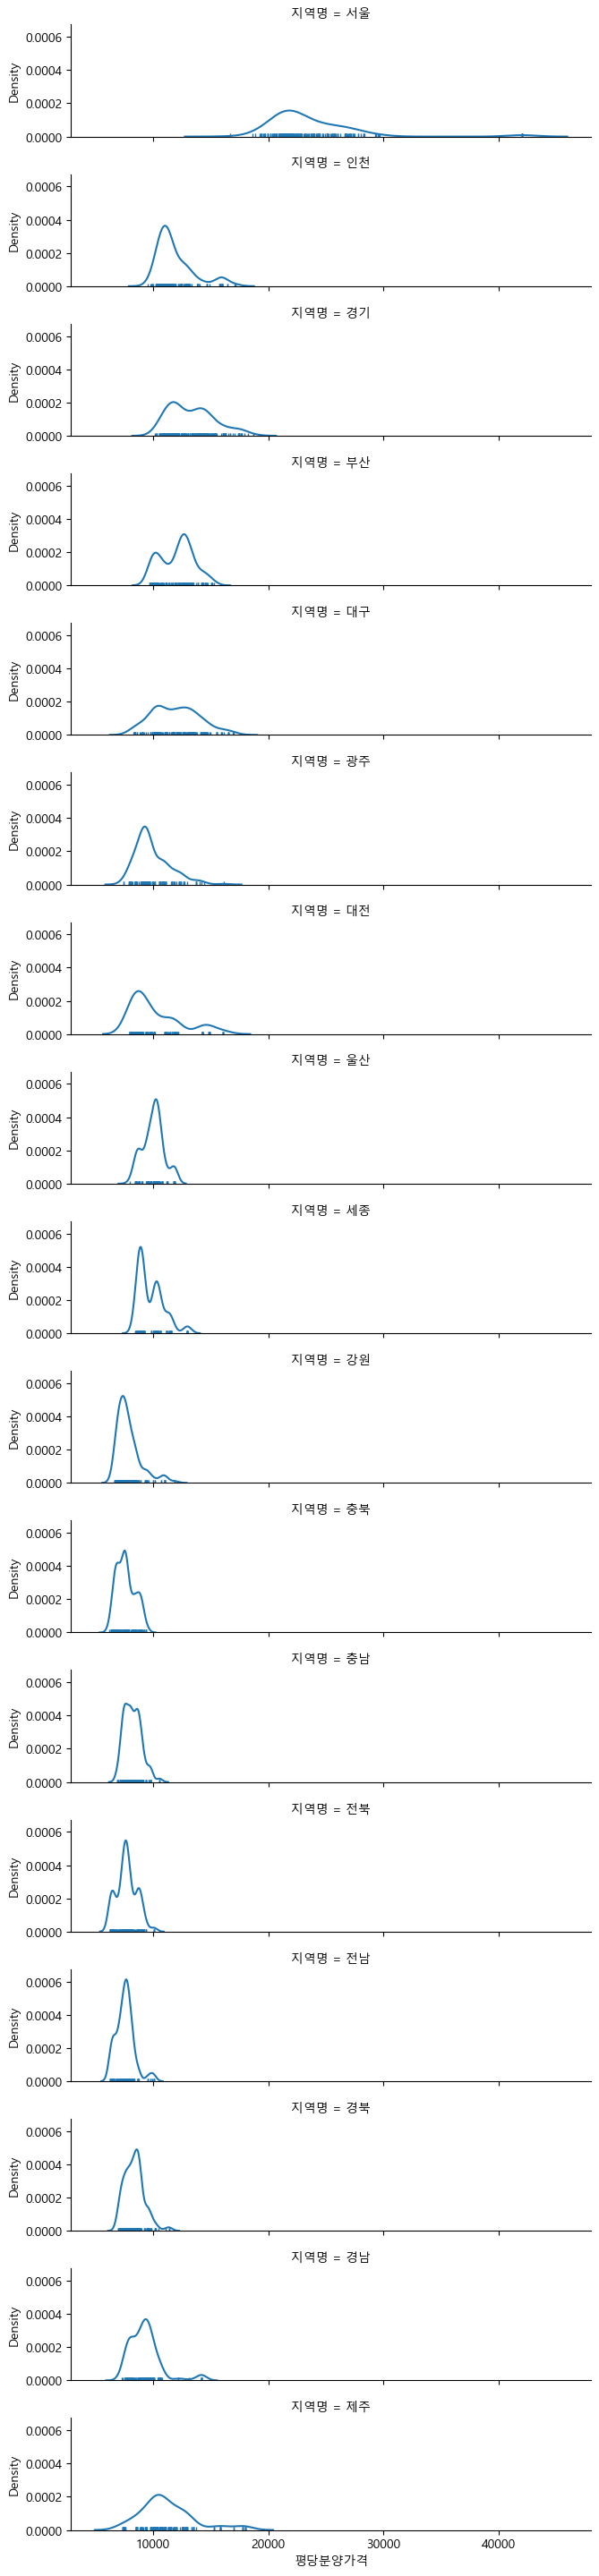

In [58]:
g = sns.FacetGrid(df_last, row='지역명',
                 height=1.7, aspect=4)
g.map(sns.distplot, '평당분양가격', hist=False, rug=True)

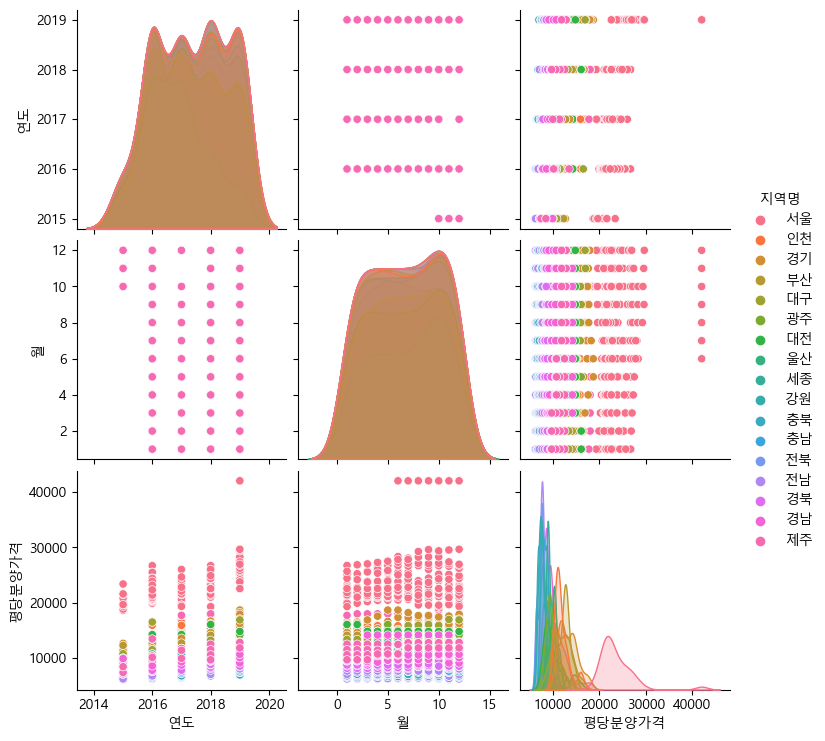

In [59]:
df_last_notnull = df_last.loc[df_last['평당분양가격'].notnull(),
                              ['지역명','연도','월','평당분양가격','전용면적']]
sns.pairplot(df_last_notnull, hue='지역명')

In [60]:
df_last['전용면적'].value_counts()

전체          867
60㎡         867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
Name: 전용면적, dtype: int64

## 2015년 8월 이전데이터

In [61]:
pd.options.display.max_columns=25
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [62]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [63]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [64]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [65]:
df_first_melt = df_first.melt(id_vars='지역', var_name='연도', value_name='기간')
df_first_melt.head()

,지역,연도,기간
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [66]:
df_first_melt.columns = ['지역명','기간','평당분양가격']
df_first_melt.head()

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [67]:
date = '2013년10월'
date

'2013년10월'

In [68]:
date.split('년')

['2013', '10월']

In [69]:
def parse_year(date):
    year = date.split('년')[0]
    year = int(year)
    return year

In [70]:
parse_year(date)

2013

In [71]:
def parse_month(date):
    month = date.split('년')[1].replace('월','')
    month = int(month)
    return month

In [72]:
parse_month(date)

10

In [73]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [74]:
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
689,인천,2016,6,3576.0,11800.8,102㎡~


In [75]:
cols = ['지역명','연도','월','평당분양가격']

In [76]:
df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', cols].copy()
df_last_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [77]:
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [79]:
df_first_prepare = df_first_melt.drop(['기간'], axis=1).copy()
df_first_prepare.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [80]:
df = pd.concat([df_first_prepare, df_last_prepare])
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
4310,전북,8144.4,2019,12
4315,전남,8091.6,2019,12
4320,경북,9616.2,2019,12
4325,경남,10107.9,2019,12


In [81]:
df['연도'].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

In [82]:
p = pd.pivot_table(df, index='연도', columns='지역명', values='평당분양가격').round()
p.head()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0


<Axes: xlabel='지역명', ylabel='연도'>

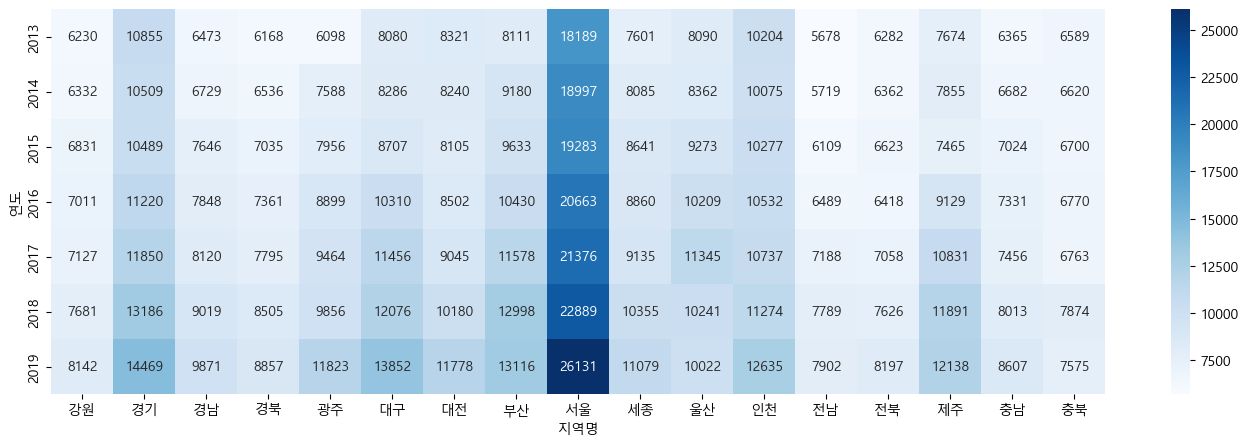

In [83]:
plt.figure(figsize=(17,5))
sns.heatmap(p, annot=True, cmap='Blues', fmt='.0f')

<Axes: xlabel='연도', ylabel='지역명'>

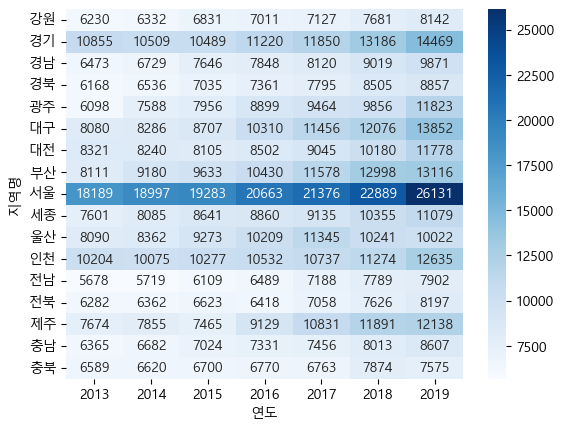

In [84]:
sns.heatmap(p.T, annot=True, cmap='Blues', fmt='.0f')

In [85]:
g = df.groupby(['연도','지역명'])['평당분양가격'].mean().round().unstack()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<Axes: xlabel='지역명', ylabel='연도'>

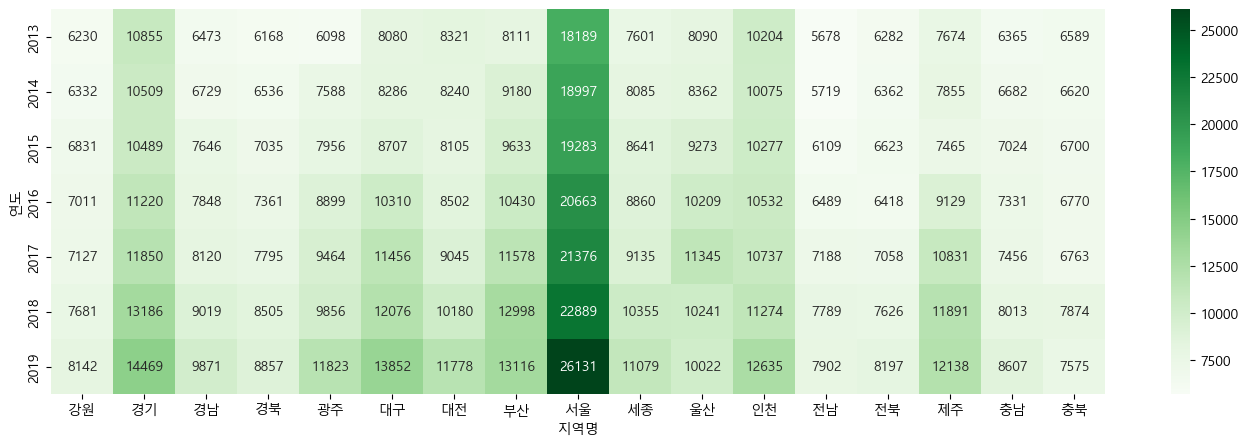

In [86]:
plt.figure(figsize=(17,5))
sns.heatmap(g, annot=True, fmt='.0f', cmap='Greens')

<Axes: xlabel='연도', ylabel='지역명'>

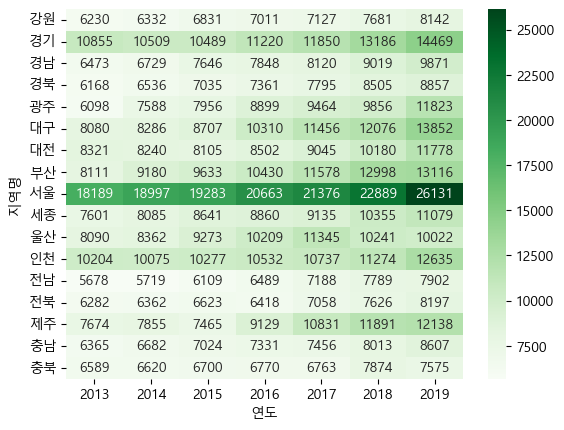

In [87]:
sns.heatmap(g.T, annot=True, fmt='.0f', cmap='Greens')

<Axes: xlabel='연도', ylabel='평당분양가격'>

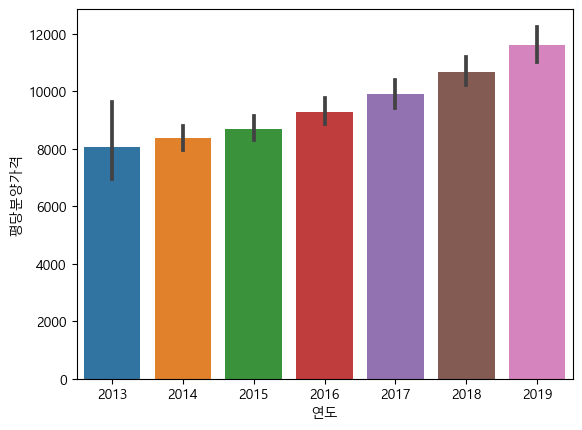

In [88]:
sns.barplot(data=df, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

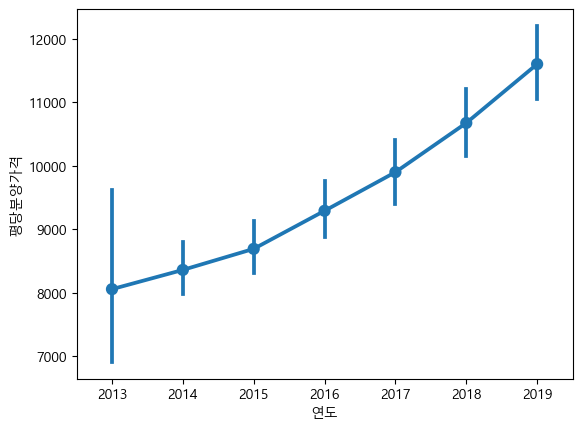

In [89]:
sns.pointplot(data=df, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

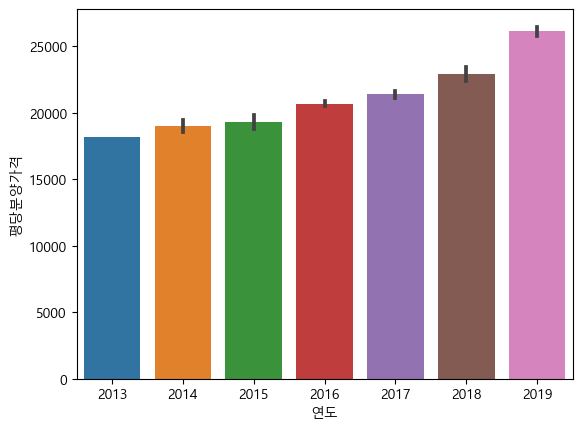

In [90]:
df_seoul = df[df['지역명'] == '서울']
sns.barplot(data=df_seoul, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

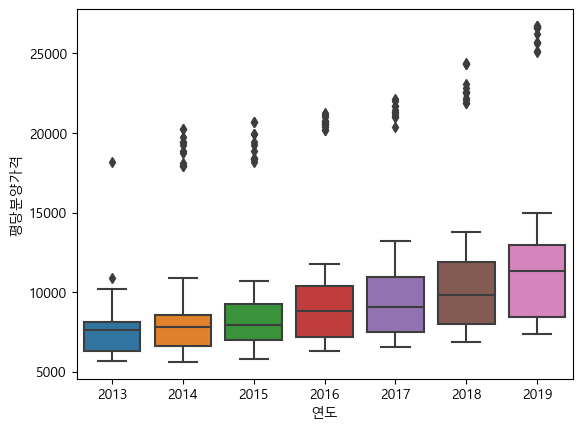

In [91]:
sns.boxplot(data=df, x='연도', y='평당분양가격')

<Axes: xlabel='연도', ylabel='평당분양가격'>

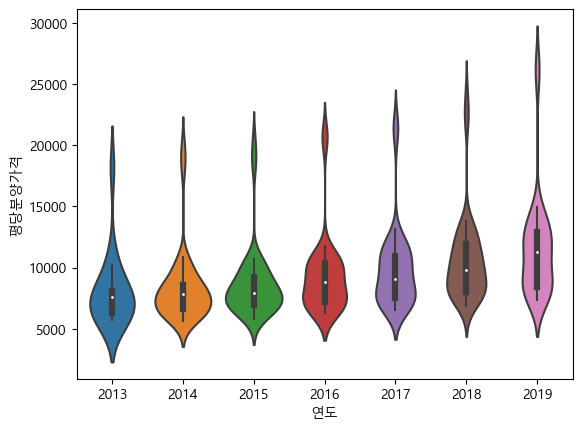

In [92]:
sns.violinplot(data=df, x='연도', y='평당분양가격')

In [94]:
# sns.swarmplot(data=df, x='연도', y='평당분양가격')

<Axes: xlabel='지역명', ylabel='평당분양가격'>

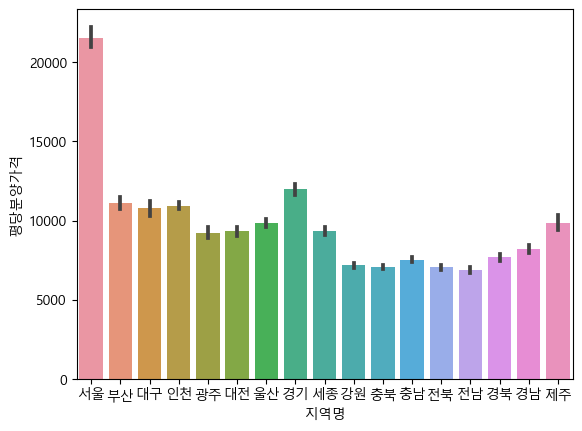

In [95]:
sns.barplot(data=df, x='지역명', y='평당분양가격')

<Axes: xlabel='지역명', ylabel='평당분양가격'>

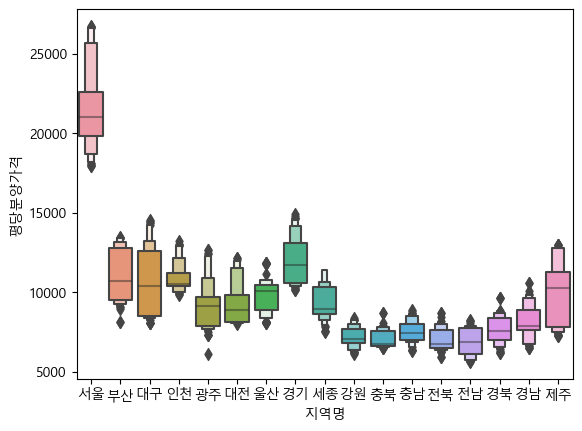

In [96]:
sns.boxenplot(data=df, x='지역명', y='평당분양가격')

<Axes: xlabel='지역명', ylabel='평당분양가격'>

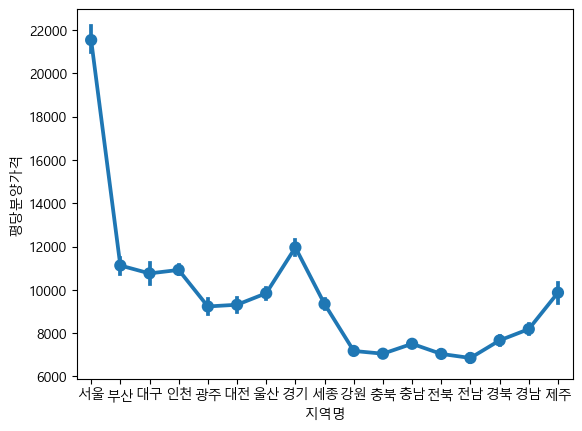

In [97]:
sns.pointplot(data=df, x='지역명', y='평당분양가격')

<Axes: xlabel='지역명', ylabel='평당분양가격'>

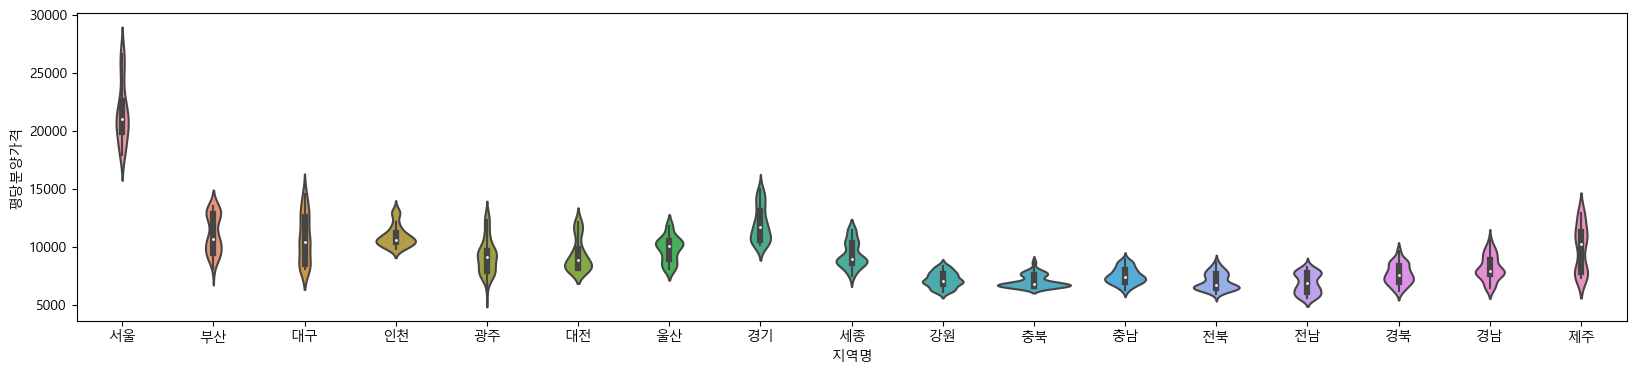

In [98]:
plt.figure(figsize=(20,4))
sns.violinplot(data=df, x='지역명', y='평당분양가격')

In [99]:
#plt.figure(figsize=(20,4))
#sns.swarmplot(data=df, x='지역명', y='평당분양가격')